In [1]:
import scipy.stats as sps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
sns.set()
plt.rcParams['figure.dpi'] = 80

# ДЗ 1.

## № 1.

$x_1, \ldots, x_n \sim Exp(\theta)$

**1)** $\frac{1}{\bar{x}}$, т. к. $\mathbb{E}x_i = \frac{1}{\theta}$

**2)** $\frac{1}{\bar{x}}$

**3)** Код со второго семинара:

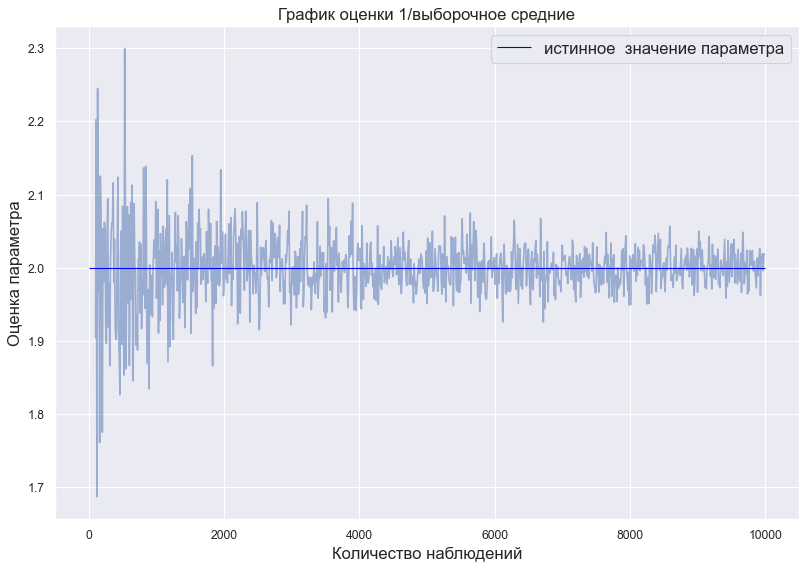

In [9]:
theta_mm = []
THETA = 2

for n in range(100, 10000, 10):
    # см. документацию https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
    sample = sps.expon(scale = 1/THETA).rvs(size=n)
    theta_mm.append(1/sample.mean())
    
plt.figure(figsize=(12,8))
plt.title("График оценки 1/выборочное средние", fontsize=15)
plt.plot(range(100, 10000, 10), theta_mm, alpha = 0.5)

plt.xlabel('Количество наблюдений', size=15)
plt.ylabel('Оценка параметра', size=15)

plt.hlines(THETA, 0, 10000, color='blue', lw=1, label='истинное  значение параметра')
plt.legend(fontsize=15);

Формально, тут мы проиллюстрировали состоятельность. Давайте посмотрим на несмещённость.

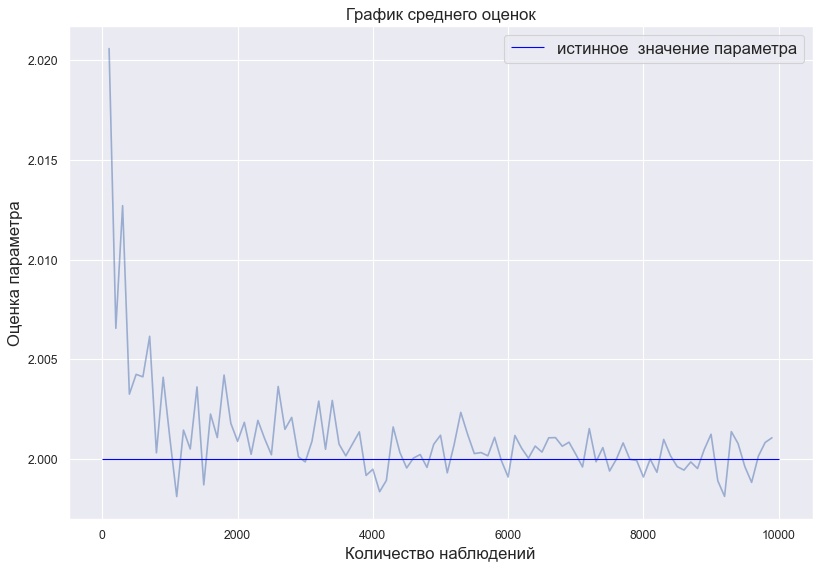

In [13]:
theta_mm_mean = []
for n in range(100, 10000, 100):
    # см. документацию https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
    sample = sps.expon(scale = 1/THETA).rvs(size=(n, 1000)) # генерим по 1000 выборок размера n
    theta_mm = 1/sample.mean(axis=0) # посчитали 1000 оценок по выборкам размера n
    theta_mm_mean.append(theta_mm.mean()) # усреднили их
    
plt.figure(figsize=(12,8))
plt.title("График среднего оценок", fontsize=15)
plt.plot(range(100, 10000, 100), theta_mm_mean, alpha = 0.5)

plt.xlabel('Количество наблюдений', size=15)
plt.ylabel('Оценка параметра', size=15)

plt.hlines(THETA, 0, 10000, color='blue', lw=1, label='истинное  значение параметра')
plt.legend(fontsize=15);

График поход на состоятельность (иллюстрируем потому что одним и тем же способом), но здесь важно увидеть, что масштаб отклонения от истинного значения при большом числе выборок очень маленькийЁ

**4)** $\frac{1}{\theta^2}$. По свойству инвариантности для $(\bar x)^2$, для выборочного второго момента - из метода моментов

**5)** Покажу для выборок размера 100 (остальные размеры - меняем одно число в коде)

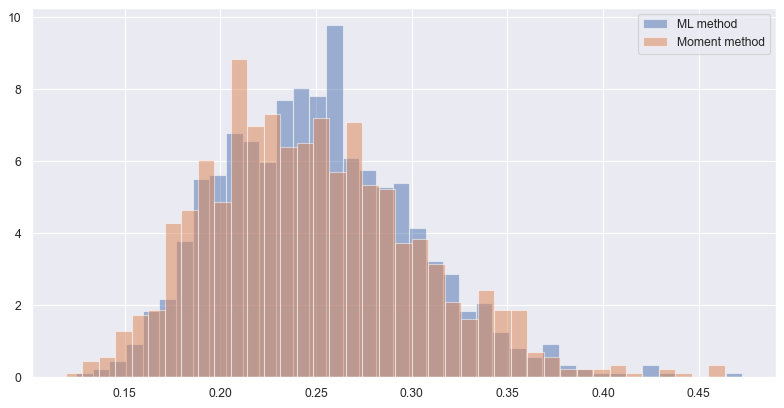

In [23]:
n = 100
THETA = 2

# см. документацию https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
sample = sps.expon(scale = 1/THETA).rvs(size=(n, 1000)) # генерим по 1000 выборок размера n
# посчитали 1000 оценок по выборкам размера n
theta_1 = sample.mean(axis=0) ** 2 
theta_2 = (sample ** 2).mean(axis=0) / 2

plt.figure(figsize=(12,6))
plt.hist(theta_1, bins=40, alpha=0.5, label='ML method', density=True)
plt.hist(theta_2, bins=40, alpha=0.5, label='Moment method', density=True)
plt.legend();

Конечно, заметно не очень явно, но по хвостам видно, что разброс у оценки методом моментов побольше. Посчитаем дисперсии.

In [24]:
print("выборочная дисперсия ML-оценки: ", theta_1.var(ddof=1))
print("выборочная дисперсия оценки методом моментов: ", theta_2.var(ddof=1))

выборочная дисперсия ML-оценки:  0.0025206736848076097
выборочная дисперсия оценки методом моментов:  0.0030587188389913952


**6)** асимптотическая эффективность ML-оценки

## № 2. (частично)

Построим гистограммы

In [82]:
with open('data_easy.npy', 'rb') as f :
    easy = np.load(f)
    
with open('data_hard.npy', 'rb') as f :
    hard = np.load(f)  

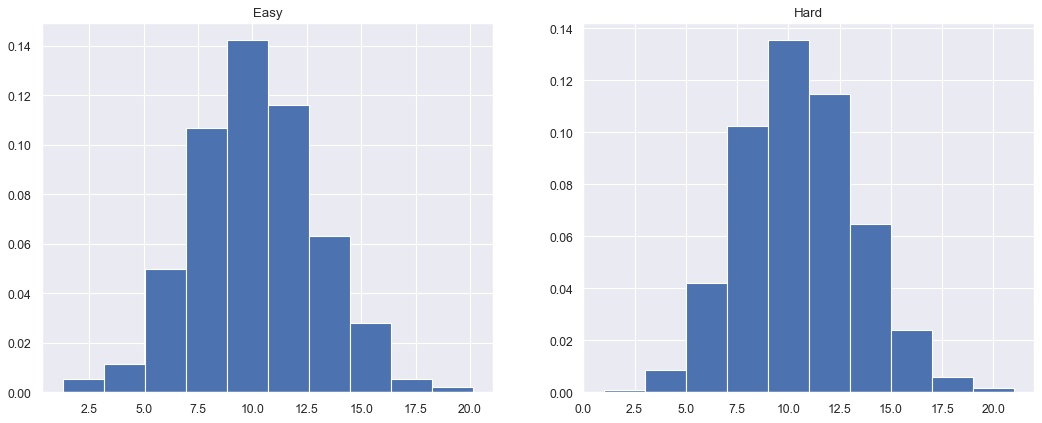

In [83]:
_, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].set_title("Easy")
ax[0].hist(easy, density=True)
ax[1].set_title("Hard")
ax[1].hist(hard, density=True);

Кажется, одно и то же. Но есть один нюанс...

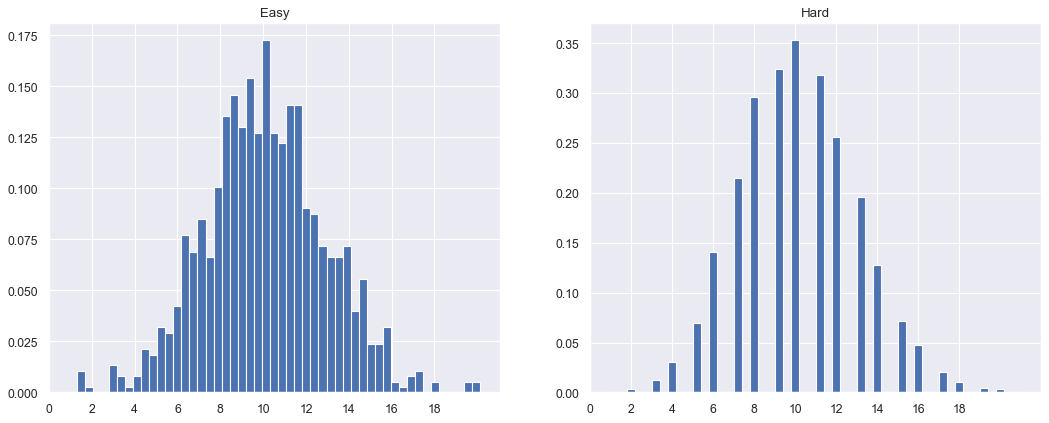

In [40]:
_, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].set_title("Easy")
ax[0].hist(easy, density=True, bins=50)
ax[0].set_xticks(np.arange(0, 20, 2))
ax[1].set_title("Hard")
ax[1].hist(hard, density=True, bins=50)
ax[1].set_xticks(np.arange(0, 20, 2));

Опа, видим в правой выборке только дискретные значения -> справа биномиальное, а слева - нормальное (как первое, что можно было предположить). И если (зная сейчас тесты) проверим, то увидим:

In [41]:
sps.shapiro(easy)

ShapiroResult(statistic=0.9972345232963562, pvalue=0.08416943997144699)

In [42]:
sps.shapiro(hard)

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.987019419670105, pvalue=3.2047365941044233e-29)

## № 3.

Ответ: да, конечно.

Пример: равномерное на числах [-2023, 0, 1, 2, 3, 4, 5, 6]. Левый квартиль 0, среднее же значительно меньше.

# ДЗ 2.

## № 1.

In [104]:
data = pd.read_csv('anorexia.txt', sep ='\t')
data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


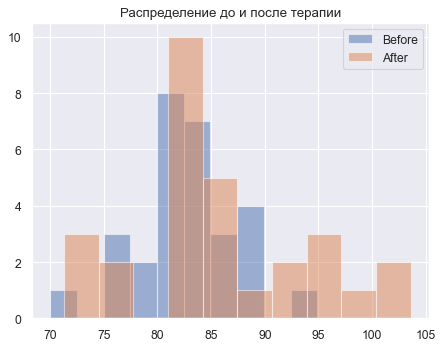

In [105]:
plt.title('Распределение до и после терапии')
plt.hist(data['Before'], label='Before', alpha=0.5)
plt.hist(data['After'], label='After', alpha=0.5)
plt.legend();

Кажется, что терапия эффективна. Но проверим тестами. Зафиксируем уровень значимости 0.05

__Шаг 1.__ Проверка на нормальность обоих выборок

In [106]:
sps.normaltest(data['Before'])

NormaltestResult(statistic=2.190665224371193, pvalue=0.33442835350192357)

In [107]:
sps.normaltest(data['After'])

NormaltestResult(statistic=0.8703912694929079, pvalue=0.64713805200456)

Нормальность не отвергается --> пользуемся t-test'ом для парных выборок, так как выборки связанные по условию. Для парных выборок не требуется равенство дисперсий. Для верности проверим нормальность разности

In [108]:
sps.normaltest(data['Before'] - data['After'])

NormaltestResult(statistic=4.831292931360963, pvalue=0.08930958467426516)

Есть

__Шаг 2.__ Применение самого теста

In [109]:
sps.ttest_rel(data['After'], data['Before'], alternative='greater')

Ttest_relResult(statistic=2.215587843931166, pvalue=0.017511298781094416)

Действительно, гипотеза о неэффективности терапии отвергается на уровне значимости 0.05.

Доверительные интервалы строим для нормальных выборок, того же уровня доверия, что и тест.

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat{\sigma}^2}{n}}.
$$

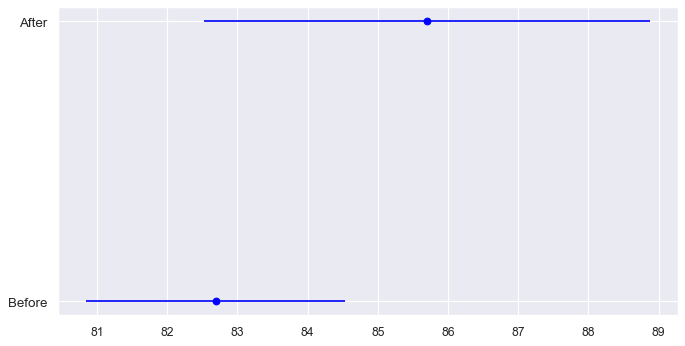

In [110]:
alpha = 0.05
cols=['when', 'mean', 'std', 'count']
df_conf_int = pd.DataFrame(columns=cols)
for when in ['Before', 'After']:
    df_conf_int = df_conf_int.append(
        dict(zip(cols, [when, data[when].mean(), data[when].std(ddof=1), data[when].size])), ignore_index=True)
df_conf_int = df_conf_int.set_index('when')
df_conf_int['count'] = pd.to_numeric(df_conf_int['count'])


df_conf_int['t_crit'] = df_conf_int['count'].apply(lambda n: sps.t(n - 1).ppf(1 - alpha/2))

# на сколько отступать вправо и влево от математического ожидания
df_conf_int['err'] =  df_conf_int['t_crit'] * df_conf_int['std'] / np.sqrt(df_conf_int['count'])
df_conf_int = df_conf_int.sort_values('mean')

center = df_conf_int['mean'].values
err = df_conf_int['err'].values

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr=err, 
             capsize=0, fmt="o", color="blue")

plt.yticks(np.arange(center.size), df_conf_int.index, fontsize=12);

Действительно после терапии вес в среднем вырос.

__?__ Но мы теперь знаем множественную проверку гипотез, может быть, она скажет, что мы ошиблись? Проверим

In [95]:
from statsmodels.stats.multitest import multipletests

# нужно передать все p-value, нескорректированный FWER и название метода
multipletests([sps.normaltest(data['Before'] - data['After']).pvalue, 
              sps.ttest_rel(data['After'], data['Before'], alternative='greater').pvalue], alpha=alpha, 
              method='holm')
# возвращает: отвергаем или нет

(array([False,  True]),
 array([0.08930958, 0.0350226 ]),
 0.025320565519103666,
 0.025)

**Вывод:** здесь мы тоже не отвергли гипотезу об эффективности терапии.

#### Как семинарский пример: проверим выборки на нескоррелированность

In [111]:
sps.pearsonr(data['After'], data['Before'])

(0.49196933112462515, 0.006713413399105883)

In [112]:
sps.spearmanr(data['After'], data['Before'])

SpearmanrResult(correlation=0.5741037721176, pvalue=0.0011277154493823669)

## № 2. (частично)

In [97]:
data = pd.read_csv('seattle.txt', sep ='\t')
data.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [98]:
sps.normaltest(data[data['Year'] == 2002]['Price'])

NormaltestResult(statistic=58.98743414016329, pvalue=1.5525350931306117e-13)

In [99]:
sps.normaltest(data[data['Year'] == 2001]['Price'])

NormaltestResult(statistic=4.183128235236117, pvalue=0.12349382580840151)

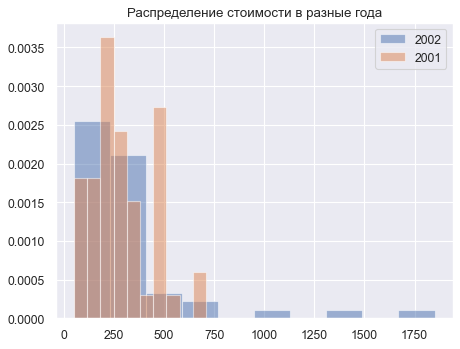

In [100]:
plt.title('Распределение стоимости в разные года')
plt.hist(data[data['Year'] == 2002]['Price'], label='2002', alpha=0.5, density=True)
plt.hist(data[data['Year'] == 2001]['Price'], label='2001', alpha=0.5, density=True)
plt.legend();

Мда, нормальностью не пахнет, и не очень похоже на наличие эффекта.

В данном случае в домашке ничего не оставалось, кроме как использовать двухвыборочный z-test

In [101]:
from statsmodels.stats.weightstats import ztest
ztest(data[data['Year'] == 2002]['Price'], x2=data[data['Year'] == 2001]['Price'], value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

(0.8057258725189664, 0.4204009280147024)

Да, тест не отвергает отсутсвие изменений

Зная тест Манна-Уитни, проверим ещё им

In [61]:
sps.mannwhitneyu(data[data['Year'] == 2002]['Price'], data[data['Year'] == 2001]['Price'])

MannwhitneyuResult(statistic=1204.5, pvalue=0.7563872675701748)

Ура, не ошиблись!

* Проверим t-test'ом

In [63]:
sps.ttest_ind(data[data['Year'] == 2002]['Price'], data[data['Year'] == 2001]['Price'], equal_var=False)

Ttest_indResult(statistic=0.8057258725189664, pvalue=0.42305786816462243)

Тоже не отвергаем. 

__?__ Почему так даже можно было сделать?

Как можно найти в английской Википедии (и не только в ней - про такое пишут, например, и в прикладных статьях Авито и предлагают способ валидации https://habr.com/ru/company/avito/blog/571094/)

In the t-test comparing the means of two independent samples, the following assumptions should be met:

* The means of the two populations being compared should follow normal distributions. Under weak assumptions, this follows in large samples from the central limit theorem, even when the distribution of observations in each group is non-normal.
* If using Student's original definition of the t-test, the two populations being compared should have the same variance (testable using F-test, Levene's test, Bartlett's test, or the Brown–Forsythe test; or assessable graphically using a Q–Q plot). If the sample sizes in the two groups being compared are equal, Student's original t-test is highly robust to the presence of unequal variances. Welch's t-test is insensitive to equality of the variances regardless of whether the sample sizes are similar.

То есть достаточно нормальности средних и одинакового размера выборок для устойчивости t-test'a к отклонениям от нормальности. Проверим нормальность распределения среднего при помощи... бутстрапа)  

При помощи бутстрапа промоделируем распределение средних двух выборок.

In [78]:
n_1 = len(data[data['Year'] == 2002]['Price'])
n_2 = len(data[data['Year'] == 2001]['Price'])

samples_1 = np.random.choice(data[data['Year'] == 2002]['Price'], size=(n_1, 100))
samples_2 = np.random.choice(data[data['Year'] == 2001]['Price'], size=(n_2, 100))

means_1 = samples_1.mean(axis=0)
means_2 = samples_2.mean(axis=0)

In [79]:
assert n_1 == n_2
sps.normaltest(means_1), sps.normaltest(means_2)

(NormaltestResult(statistic=2.3349097937851, pvalue=0.3111578631941424),
 NormaltestResult(statistic=2.155975764375218, pvalue=0.3402795197586983))

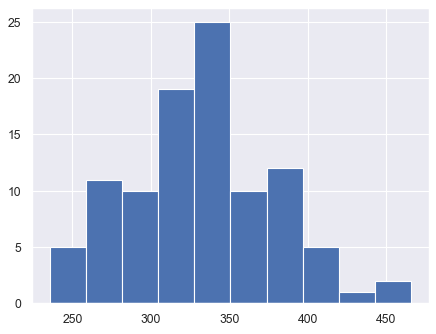

In [80]:
plt.hist(means_1);

## № 3. (частично)

In [42]:
data = pd.read_csv('methylphenidate.txt', sep ='\t')
data.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


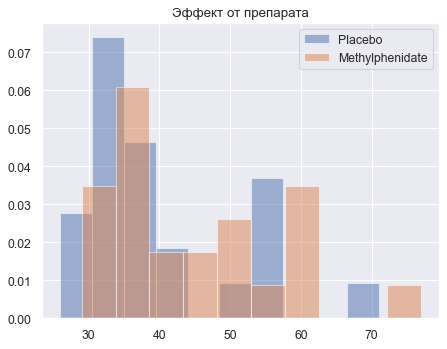

In [43]:
plt.title('Эффект от препарата')
plt.hist(data['Placebo'], label='Placebo', alpha=0.5, density=True)
plt.hist(data['Methylphenidate'], label='Methylphenidate', alpha=0.5, density=True)
plt.legend();

Видим предположительное наличие эффекта от препарата

In [44]:
sps.normaltest(data['Placebo'])

NormaltestResult(statistic=7.411292481073408, pvalue=0.024584324845712657)

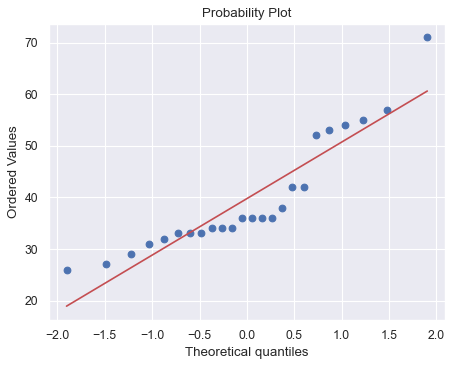

In [45]:
sps.probplot(data['Placebo'], plot=plt);

In [46]:
sps.normaltest(data['Methylphenidate'])

NormaltestResult(statistic=3.711436268669459, pvalue=0.15634062877811003)

In [47]:
sps.normaltest(data['Methylphenidate'] - data['Placebo'])

NormaltestResult(statistic=0.607684243310523, pvalue=0.7379773678991197)

Видим, что в одном случае гипотеза о нормальности отвергается, но "слабо". При этом гипотеза о нормальности разности не отвергается. Поэтому лучше сделать t-test'ом, но можно и z-test (мощность будет меньше)

*На этапе подготовки я понял, что на лекции явно не звучал парный z-test. Но: можно было догадаться, что это как t-test, но с квантилями нормального, либо спросить*

In [10]:
def z_test_rel(x, y):
    stat = sps.ttest_rel(x, y).statistic
    return stat, sps.norm(0, 1).cdf(stat) / 2

In [11]:
z_test_rel(data['Placebo'], data['Methylphenidate'])

(-3.2223624451230406, 0.00031784549009091114)

Видим, что гипотеза об отсутсвии эффекта отвергается. 

* Проверим также тестом Стьюдента с множественной проверкой гипотез.

In [13]:
from statsmodels.stats.multitest import multipletests
alpha = 0.05

multipletests([sps.normaltest(data['Placebo']).pvalue, sps.normaltest(data['Methylphenidate']).pvalue, 
              sps.ttest_rel(data['Placebo'], data['Methylphenidate']).pvalue], alpha=alpha, 
              method='holm')

(array([ True, False,  True]),
 array([0.04916865, 0.15634063, 0.01131446]),
 0.016952427508441503,
 0.016666666666666666)

Нормальность отвергается на грани, при этом t_test уверенно отвергает нулевую гипотезу об отсутсвии эффекта

* Ну и наконец тест Уилкоксона, который ничего не требует от нашей выборки, но эффект, который проверяем -- сместилась медиана.

In [19]:
sps.wilcoxon(data['Placebo'], data['Methylphenidate'])

WilcoxonResult(statistic=48.5, pvalue=0.0025163888931274414)

Отвергаем!